In [1]:
from common_lib import DataManager
from common_lib import AnnotationManager
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

data = DataManager.load('labeled_giant_data.json')
am = AnnotationManager(data.class_dict)

rec = data[105]
rec

print(data.class_dict)

[{'class_id': 0, 'class_name': 'NG', 'parent': None}, {'class_id': 1, 'class_name': 'word', 'parent': None}, {'class_id': 2, 'class_name': 'Face_Defect', 'parent': 'NG'}, {'class_id': 3, 'class_name': 'Edge_Defect', 'parent': 'NG'}, {'class_id': 4, 'class_name': 'grindmark', 'parent': 'Face_Defect'}, {'class_id': 5, 'class_name': 'TTP', 'parent': 'Face_Defect'}, {'class_id': 6, 'class_name': 'black_skin', 'parent': 'Face_Defect'}, {'class_id': 7, 'class_name': 'word_error', 'parent': 'Face_Defect'}, {'class_id': 8, 'class_name': 'rust', 'parent': 'Face_Defect'}, {'class_id': 9, 'class_name': 'dent', 'parent': 'Edge_Defect'}, {'class_id': 10, 'class_name': 'starving', 'parent': 'Edge_Defect'}, {'class_id': 11, 'class_name': 'slot_error', 'parent': 'Edge_Defect'}]


['word'] 2958.0 1214.0 3057.0 1295.0 3007.5 1254.5
['word'] 2920.0 1113.0 3021.0 1195.0 2970.5 1154.0
['word'] 977.0 1959.0 1068.0 2033.0 1022.5 1996.0
['word'] 942.0 1868.0 1035.0 1939.0 988.5 1903.5
['word'] 1017.0 2042.0 1116.0 2121.0 1066.5 2081.5
['word'] 1070.0 2125.0 1160.0 2207.0 1115.0 2166.0
['word'] 893.0 1614.0 984.0 1675.0 938.5 1644.5
['word'] 905.0 1712.0 998.0 1775.0 951.5 1743.5
['word'] 921.0 1812.0 1020.0 1836.0 970.5 1824.0


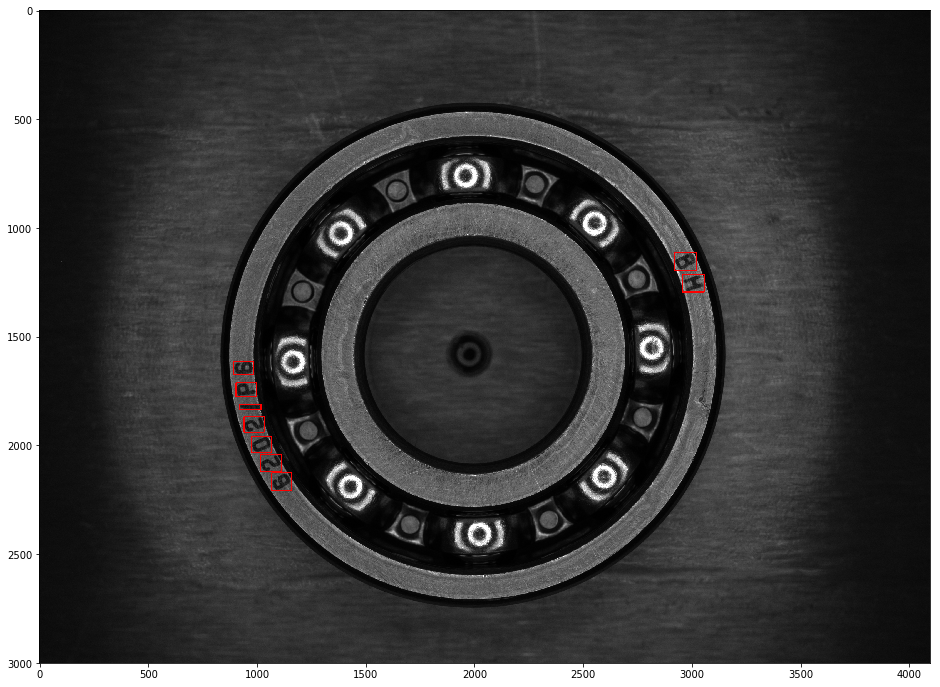

In [24]:
image_data_root = '/workspace/dataSet/raw/bearing/'
rec = data[105]
image_path = image_data_root + rec['info']['image_path']
img = cv2.imread(image_path, 1)

# circles = rec['info']['circles']
# for x,y,r in circles:
#     cv2.circle(img, (int(x), int(y)), int(r), (255,0,0), 10)

for inst in rec['instances']:
    class_names = am.get_classname(inst)
    if 'word' in class_names:
        xmin, ymin, xmax, ymax = am.get_xyxy(inst)
        x0 = (xmin+xmax)/2
        y0 = (ymin+ymax)/2
        print(class_names, xmin, ymin, xmax, ymax, x0, y0)
        
        cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255,0,0), 3)



plt.figure(figsize=(20,12))
plt.imshow(img)
plt.show()